In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1

Прокурор оценил
$$P(у\ случайного\ человека\ редкая\ группа\ крови)$$

Прокурор должен был оценить
$$P(подсудимый\ виновен |редкая\ группа\ крови) = \frac{P(редкая\ группа\ крови|подсудимый\ виновен) P(подсудимый\ виновен)}{P(редкая\ группа\ крови)}$$\
$$P(редкая\ группа\ крови) = 0.01$$
$$P(редкая\ группа\ крови|подсудимый\ виновен)=1$$
Что даёт
$$P(подсудимый\ виновен |редкая\ группа\ крови) = 100P(редкая\ группа\ крови)$$

# Задание 2

Адвокат оценил вероятность
$$P(случайный\ человек\ виновен |у\ него\ редкая\ группа\ крови)$$
а должен был оценить вероятность
$$P(подсудимый\ виновен |у\ него\ редкая\ группа\ крови)$$

# Задание 3

${A_1}$ - человек болен\
${A_2}$ - человек здоров\
${B_1}$ - тест положительный\
${B_2}$ - тест отрицательный

$$P({A_1}|{B_1}) = \frac{P({B_1}|{A_1}) P({A_1})}{P({B_1})}$$
$$P({B_1})=P({B_1}|{A_1})P({A_1})+P({B_1}|{A_2})P({A_2})$$
$$P({A_1}|{B_2}) = \frac{P({B_2}|{A_1}) P({A_1})}{P({B_2})}$$
$$P({B_2})=P({B_2}|{A_1})P({A_1})+P({B_2}|{A_2})P({A_2})$$
$$P({A_1})=0.01$$
$$P({A_2})=0.99$$

In [68]:
p_a1 = 0.01
p_a2 = 0.99

def calc_post_tp(p_b1_a1, p_b1_a2):
    return p_b1_a1 * p_a1 / (p_b1_a1 * p_a1 + p_b1_a2 * p_a2)

def calc_post_fn(p_b2_a1, p_b2_a2):
    return p_b2_a1 * p_a1 / (p_b2_a1 * p_a1 + p_b2_a2 * p_a2)

In [69]:
p_b1_a1 = np.linspace(0.95, 1, 100)
p_b1_a2 = np.linspace(0.05, 0, 100)
p_b2_a1 = 1 - p_b1_a1
p_b2_a2 = 1 - p_b1_a2

In [70]:
post_decrease_fn_a1_b1 = calc_post_tp(p_b1_a1, 0.05)
post_decrease_fp_a1_b1 = calc_post_tp(0.95, p_b1_a2)

In [71]:
post_decrease_fn_a1_b2 = calc_post_fn(p_b2_a1, 0.95)
post_decrease_fp_a1_b2 = calc_post_fn(0.05, p_b2_a2)

In [72]:
percent_increase = np.linspace(0, 5, 100)

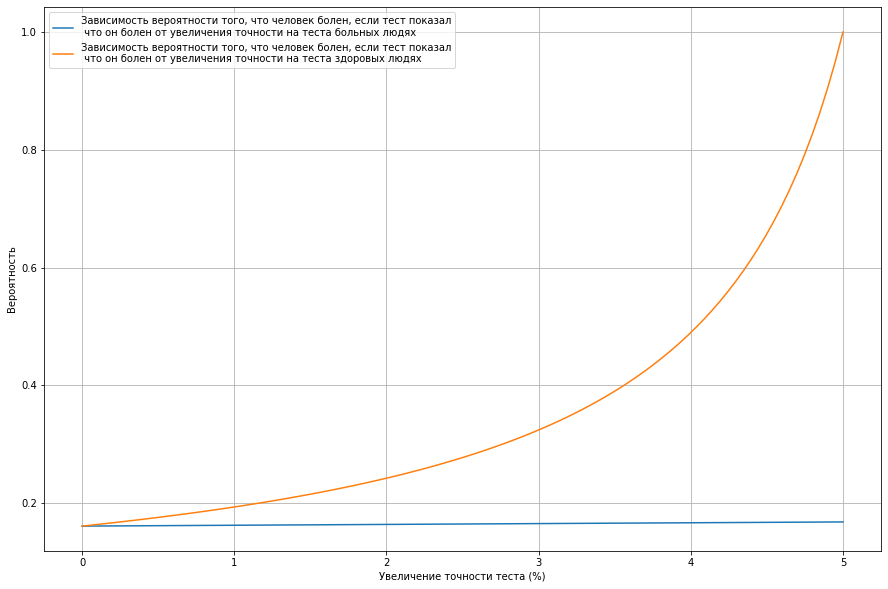

In [73]:
plt.figure(figsize=(15, 10))
plt.plot(percent_increase, post_decrease_fn_a1_b1, label='Зависимость вероятности того, что человек болен,'\
         ' если тест показал\n что он болен от увеличения точности на теста больных людях')
plt.plot(percent_increase, post_decrease_fp_a1_b1, label='Зависимость вероятности того, что человек болен,'\
         ' если тест показал\n что он болен от увеличения точности на теста здоровых людях')
plt.xlabel('Увеличение точности теста (%)')
plt.ylabel('Вероятность')
plt.grid()
plt.legend()
plt.show()

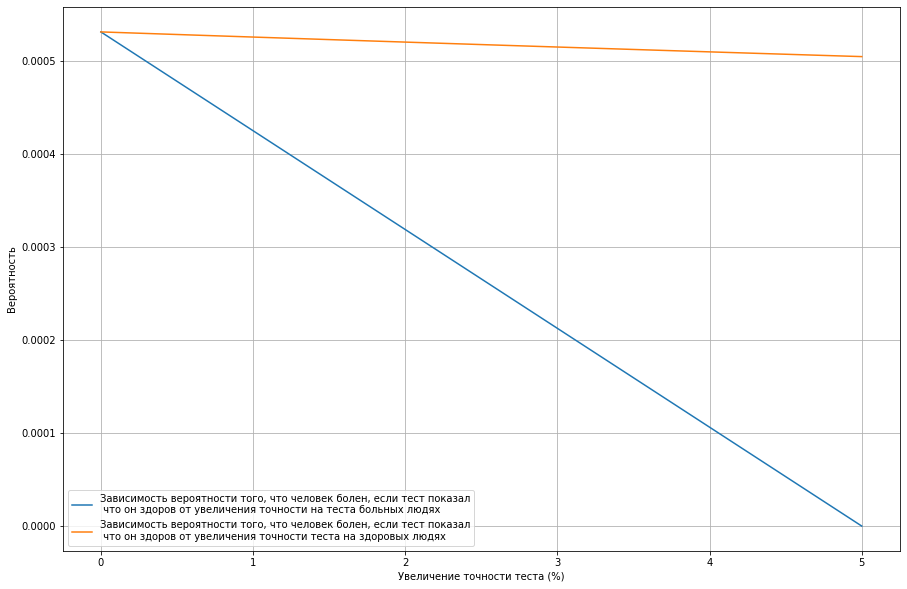

In [74]:
plt.figure(figsize=(15, 10))
plt.plot(percent_increase, post_decrease_fn_a1_b2, label='Зависимость вероятности того, что человек болен,'\
         ' если тест показал\n что он здоров от увеличения точности на теста больных людях')
plt.plot(percent_increase, post_decrease_fp_a1_b2, label='Зависимость вероятности того, что человек болен,'\
         ' если тест показал\n что он здоров от увеличения точности теста на здоровых людях')
plt.xlabel('Увеличение точности теста (%)')
plt.ylabel('Вероятность')
plt.grid()
plt.legend()
plt.show()

Я бы предложил медикам работать над точностью теста на здоровых людях, т.к. это даёт наиболее ощутимый прирост вероятности того, что человек действительно болен при положительном тесте, позволив отсеивать большое количество здоровых тестируемых.

Увеличение же теста на больных людях почти не повлияет на количество действительно больных при положительном тесте, но позволит выявлять всех больных, что может помочь остановить распространение коронавируса.

Но, связи с тяжелой эпидемиологический обстановкой в г. Москва, нехваткой врачей и больничных коек, на данный момент, мне кажется, критической задачей является разгрузка медицинской системы